## Raw Data

In [8]:
## Initial Set up for code
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import signal as sig
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

## plt.style.available to see more styles
plt.style.use('ggplot')


Data is arranged into the following columns.

1. Longitudinal position of the center of buoyancy, adimensional.
2. Prismatic coefficient, adimensional.
3. Length-displacement ratio, adimensional.
4. Beam-draught ratio, adimensional.
5. Length-beam ratio, adimensional.
6. Froude number, adimensional.

The measured variable is the residuary resistance per unit weight of displacement:

7. Residuary resistance per unit weight of displacement, adimensional. 

In [9]:
# import raw data
columnNames = ['Center of Bouyancy','Prismatic Coefficient','Length:Displacement','Beam:Draught','Length:Beam','Froude Number','Residuary Resistance:Displacement']
yachtData = pd.read_csv("raw/data.csv", names=columnNames, delim_whitespace=True)
display(yachtData.describe())


,Center of Bouyancy,Prismatic Coefficient,Length:Displacement,Beam:Draught,Length:Beam,Froude Number,Residuary Resistance:Displacement
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,-2.381818,0.564136,4.788636,3.936818,3.206818,0.287500,10.495357
std,1.513219,0.023290,0.253057,0.548193,0.247998,0.100942,15.160490
min,-5.000000,0.530000,4.340000,2.810000,2.730000,0.125000,0.010000
25%,-2.400000,0.546000,4.770000,3.750000,3.150000,0.200000,0.777500
50%,-2.300000,0.565000,4.780000,3.955000,3.150000,0.287500,3.065000
75%,-2.300000,0.574000,5.100000,4.170000,3.510000,0.375000,12.815000
max,0.000000,0.600000,5.140000,5.350000,3.640000,0.450000,62.420000


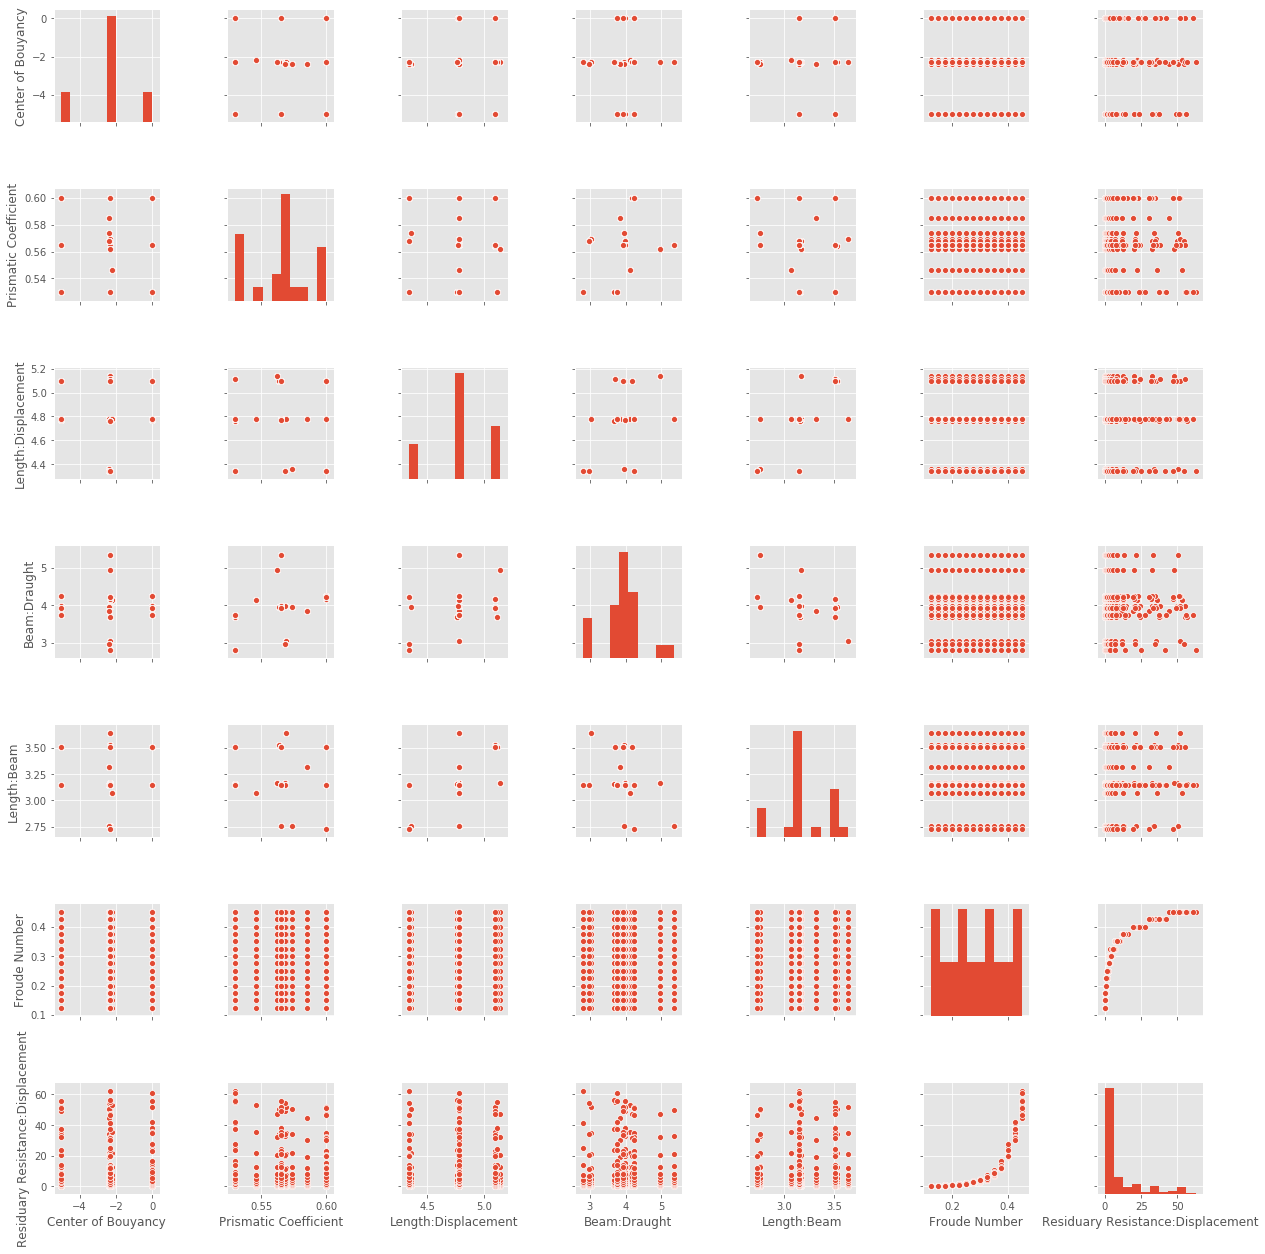

In [10]:
sns.pairplot(yachtData)

In [11]:
yachtData.corr()


,Center of Bouyancy,Prismatic Coefficient,Length:Displacement,Beam:Draught,Length:Beam,Froude Number,Residuary Resistance:Displacement
Center of Bouyancy,1.000000e+00,-8.610666e-03,-2.674076e-03,2.928595e-03,-3.369351e-03,-1.668376e-17,0.019306
Prismatic Coefficient,-8.610666e-03,1.000000e+00,-4.631607e-02,3.394618e-01,-8.669450e-02,1.682471e-17,-0.028569
Length:Displacement,-2.674076e-03,-4.631607e-02,1.000000e+00,3.768233e-01,6.763646e-01,-2.300562e-17,-0.002967
Beam:Draught,2.928595e-03,3.394618e-01,3.768233e-01,1.000000e+00,-3.802223e-01,-1.307060e-17,-0.012421
Length:Beam,-3.369351e-03,-8.669450e-02,6.763646e-01,-3.802223e-01,1.000000e+00,-2.889217e-17,-0.001025
Froude Number,-1.668376e-17,1.682471e-17,-2.300562e-17,-1.307060e-17,-2.889217e-17,1.000000e+00,0.810092
Residuary Resistance:Displacement,1.930617e-02,-2.856912e-02,-2.967365e-03,-1.242113e-02,-1.025470e-03,8.100922e-01,1.000000


In [45]:
X = yachtData[[
    'Center of Bouyancy'
   ,'Prismatic Coefficient'
   ,'Length:Displacement'
   ,'Beam:Draught'
   ,'Length:Beam'
   ,'Froude Number'
    ]].values


Y = yachtData[['Residuary Resistance:Displacement']].values
#Y = yachtData[['Froude Number']].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4) #, random_state=101)

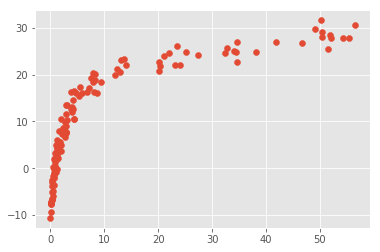

In [47]:
lm = LinearRegression()
lm.fit(X_train,y_train)

y_pred = lm.predict(X_test)

# plt.figure()
# plt.scatter(X_test[:,5], y_test, label="Actual Values")
# plt.scatter(X_test[:,5], y_pred, label="Predicted Values")
# plt.legend()

plt.figure()
#plt.plot(y_pred, label="predicted")
#plt.plot(y_test, label="actual")
#plt.legend()

plt.scatter(y_test,y_pred)



In [50]:
polynomial_features= PolynomialFeatures(degree=3)
x_train_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_train_poly, y_train)

y_test_predict = model.predict(polynomial_features.fit_transform(X_test))


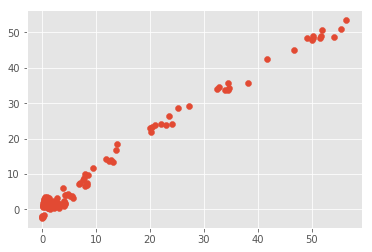

In [51]:
#plt.plot(y_test_predict, label="predicted")
#plt.plot(y_test, label="actual")
#plt.legend()
plt.scatter(y_test,y_test_predict)